🌸 Iris Classification Project

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import different models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:

# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], 
                 columns=iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [3]:
# 1. Basic Dataset Information
print("=== Dataset Overview ===")
print("\nShape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

=== Dataset Overview ===

Shape: (150, 6)

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0     0.0  setosa  
1     0.0  setosa  
2     0.0  setosa  
3     0.0  setosa  
4     0.0  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non

In [4]:
# 2. Statistical Summary
print("\n=== Statistical Summary ===")
print(df.describe())


=== Statistical Summary ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [5]:
# 3. Check for Missing Values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


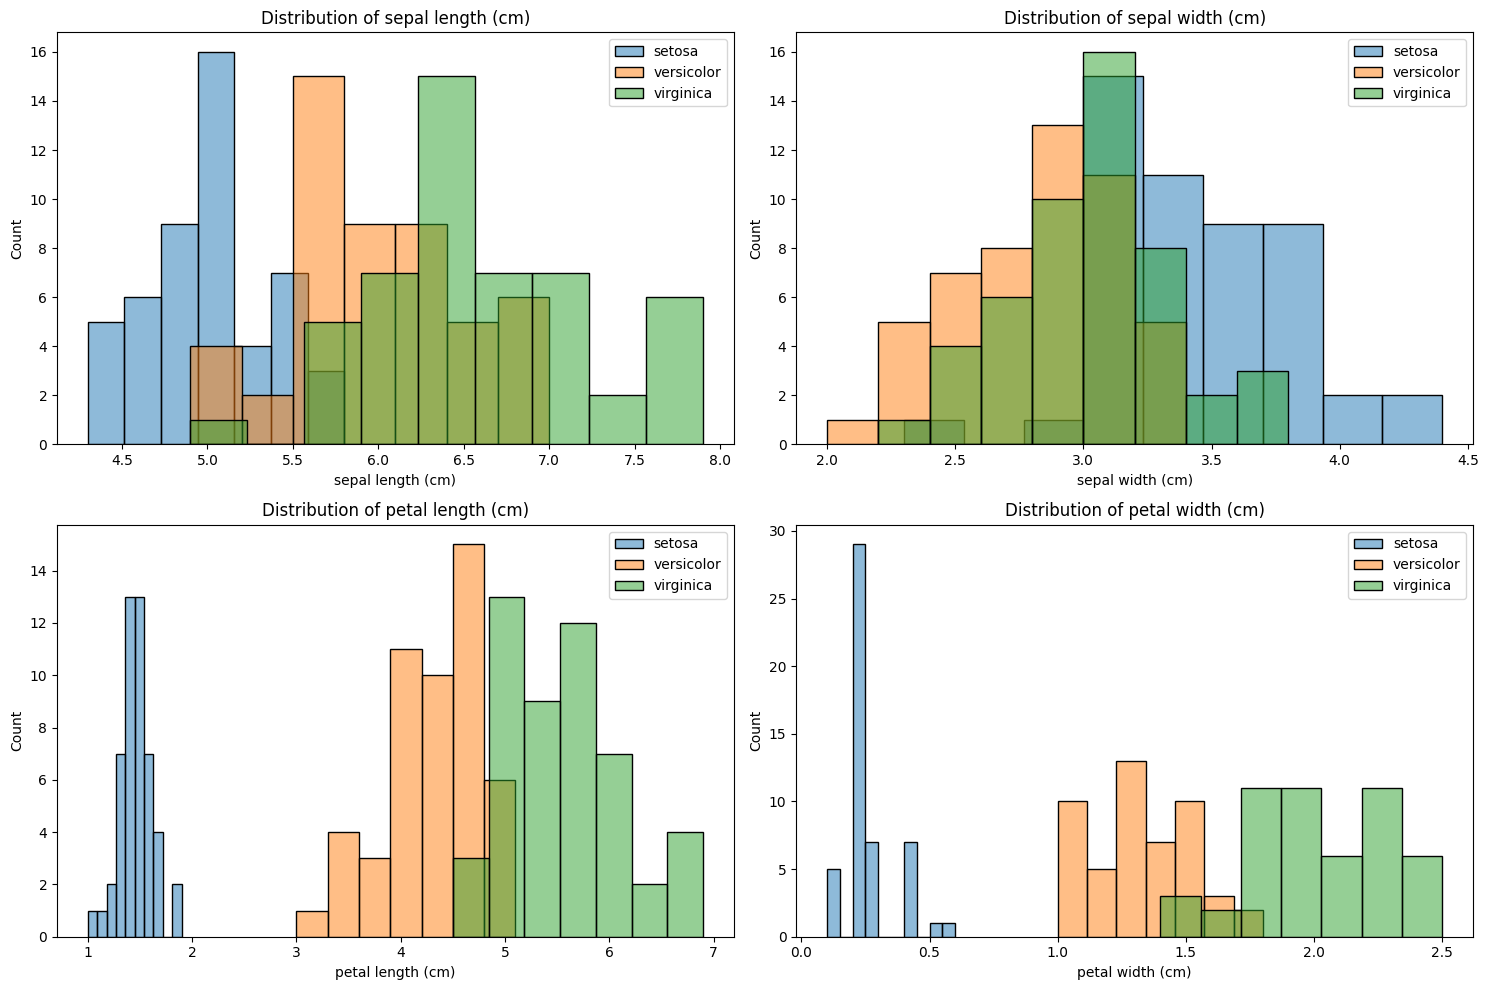

In [6]:
# 4. Univariate Analysis

# 4.1 Distribution Plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in iris.target_names:
        subset = df[df['species'] == species]
        sns.histplot(data=subset, x=feature, label=species, alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

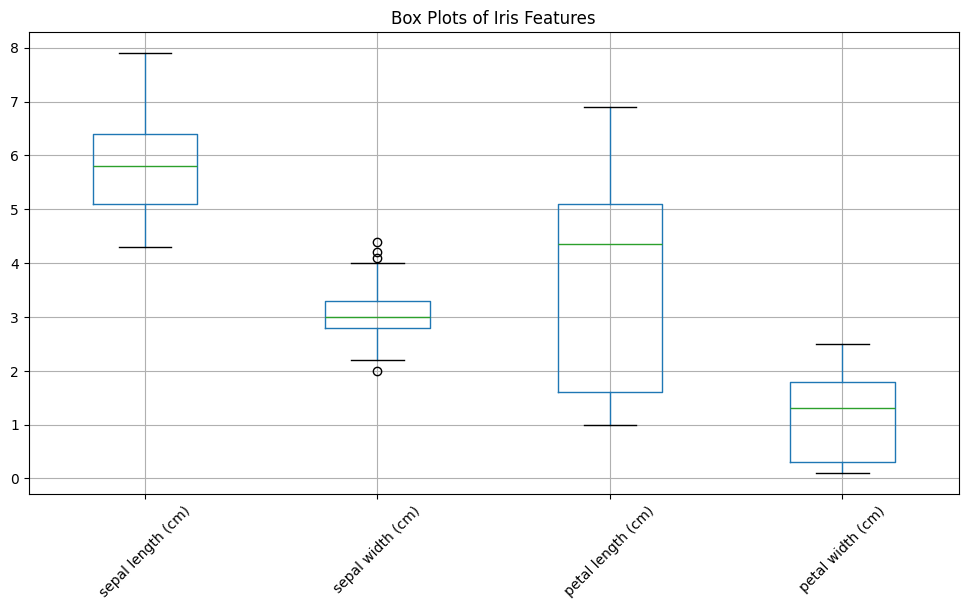

In [7]:
# 4.2 Box Plots
plt.figure(figsize=(12, 6))
df.boxplot(column=iris.feature_names)
plt.title('Box Plots of Iris Features')
plt.xticks(rotation=45)
plt.show()

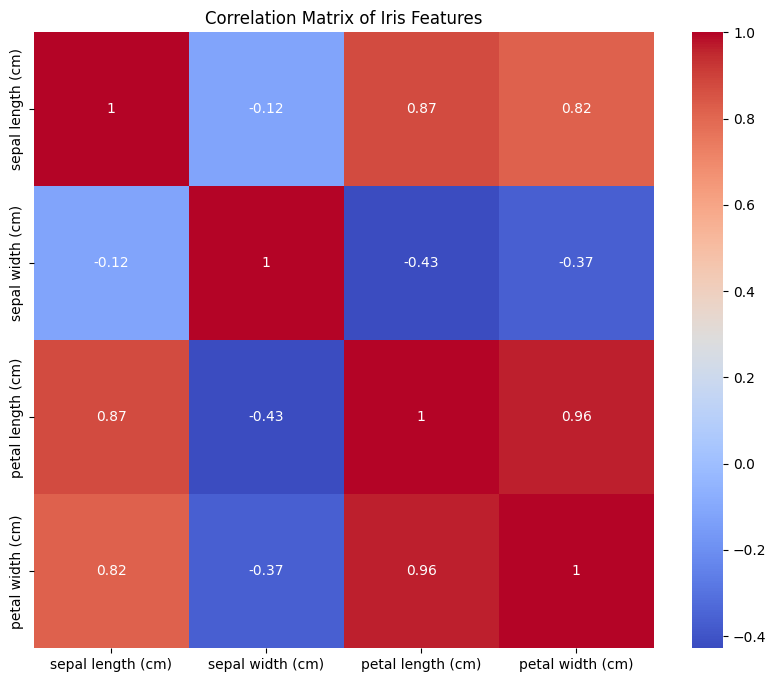

In [8]:
# 5. Bivariate Analysis

# 5.1 Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(['target', 'species'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Features')
plt.show()


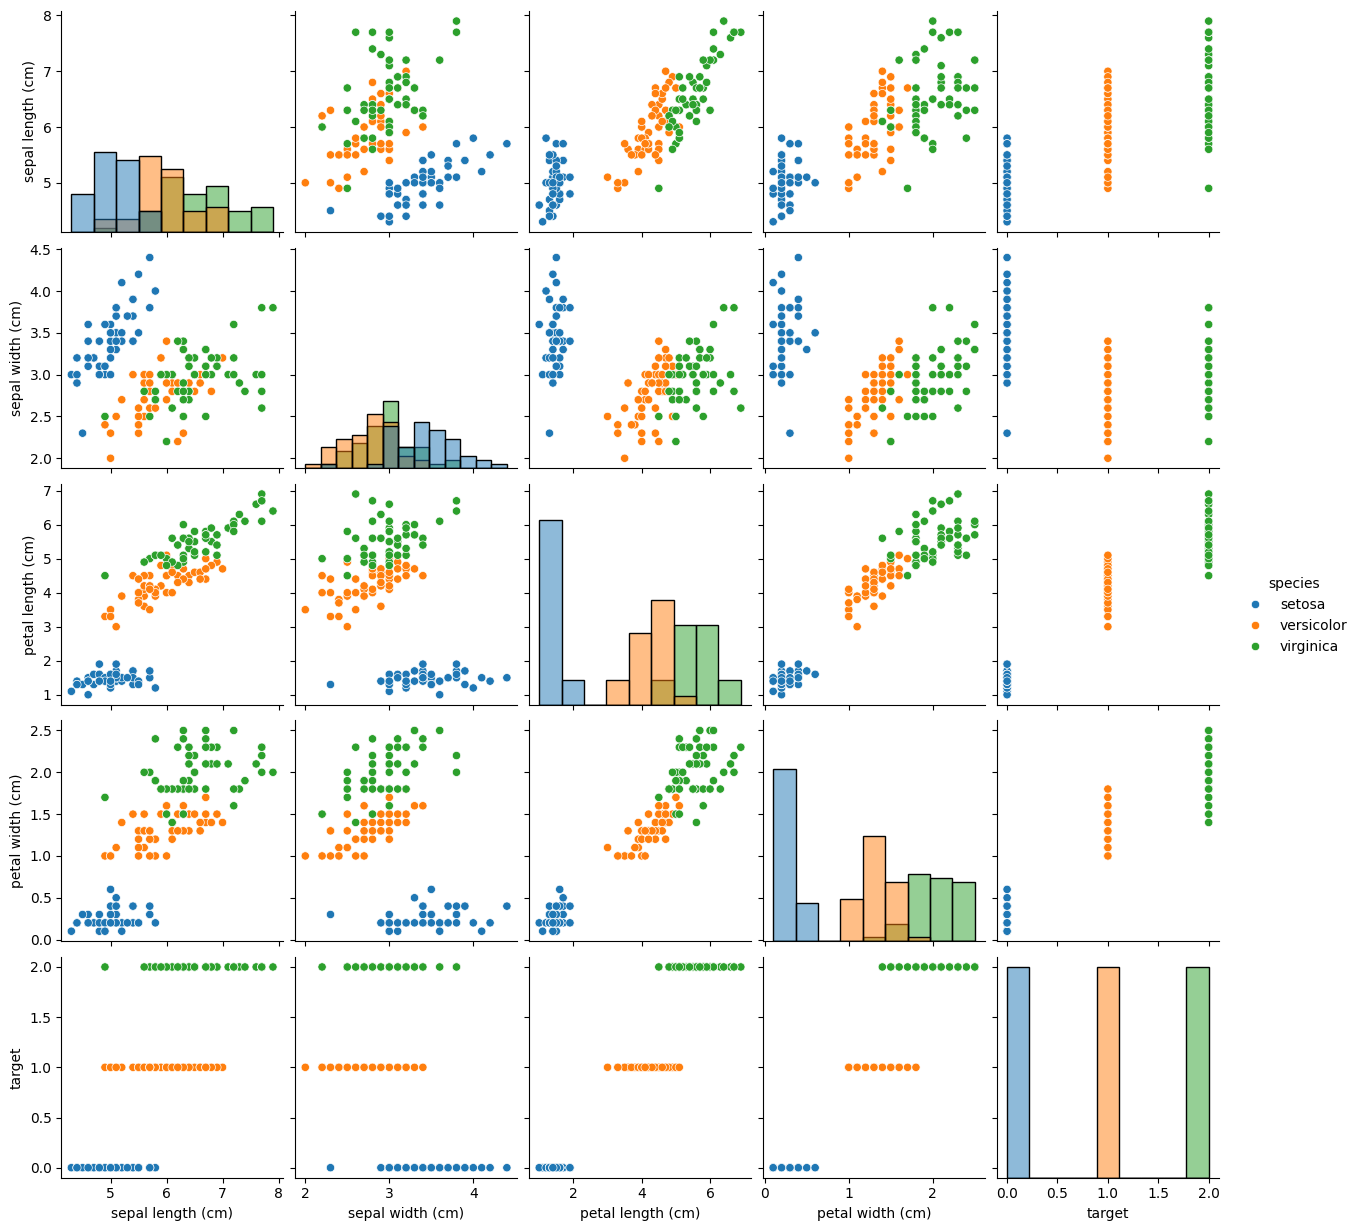

In [9]:
# 5.2 Scatter Plot Matrix
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()

In [10]:
# 6. Statistical Tests

# 6.1 Normality Test (Shapiro-Wilk)
print("\n=== Normality Tests ===")
for feature in iris.feature_names:
    stat, p_value = stats.shapiro(df[feature])
    print(f"Shapiro-Wilk test for {feature}:")
    print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")


=== Normality Tests ===
Shapiro-Wilk test for sepal length (cm):
Statistic: 0.9761, p-value: 0.0102
Shapiro-Wilk test for sepal width (cm):
Statistic: 0.9849, p-value: 0.1012
Shapiro-Wilk test for petal length (cm):
Statistic: 0.8763, p-value: 0.0000
Shapiro-Wilk test for petal width (cm):
Statistic: 0.9018, p-value: 0.0000


In [11]:
# 6.2 ANOVA Test
print("\n=== One-way ANOVA Tests ===")
for feature in iris.feature_names:
    setosa = df[df['species'] == 'setosa'][feature]
    versicolor = df[df['species'] == 'versicolor'][feature]
    virginica = df[df['species'] == 'virginica'][feature]
    
    f_stat, p_value = stats.f_oneway(setosa, versicolor, virginica)
    print(f"\nANOVA test for {feature}:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")


=== One-way ANOVA Tests ===

ANOVA test for sepal length (cm):
F-statistic: 119.2645, p-value: 0.0000

ANOVA test for sepal width (cm):
F-statistic: 49.1600, p-value: 0.0000

ANOVA test for petal length (cm):
F-statistic: 1180.1612, p-value: 0.0000

ANOVA test for petal width (cm):
F-statistic: 960.0071, p-value: 0.0000


In [12]:
# 7. Summary Statistics by Species
print("\n=== Summary Statistics by Species ===")
for species in iris.target_names:
    print(f"\nSummary for {species}:")
    print(df[df['species'] == species].describe())


=== Summary Statistics by Species ===

Summary for setosa:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  target  
count         50.000000    50.0  
mean           0.246000     0.0  
std            0.105386     0.0  
min            0.100000     0.0  
25%            0.200000     0.0  
50%            0.200000     0.0  
75%            0.300000     0.0  
max            0.600000     0.0  

Summary for versicolor:
       sepal length (cm

In [13]:
# 8. Additional Insights
print("\n=== Additional Insights ===")


=== Additional Insights ===


In [14]:
# 8.1 Feature Ranges
print("\nFeature Ranges:")
for feature in iris.feature_names:
    print(f"{feature}:")
    print(f"  Min: {df[feature].min():.2f}")
    print(f"  Max: {df[feature].max():.2f}")
    print(f"  Range: {df[feature].max() - df[feature].min():.2f}")



Feature Ranges:
sepal length (cm):
  Min: 4.30
  Max: 7.90
  Range: 3.60
sepal width (cm):
  Min: 2.00
  Max: 4.40
  Range: 2.40
petal length (cm):
  Min: 1.00
  Max: 6.90
  Range: 5.90
petal width (cm):
  Min: 0.10
  Max: 2.50
  Range: 2.40


In [15]:
# 8.2 Class Distribution
print("\nClass Distribution:")
print(df['species'].value_counts())


Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [16]:
# 8.3 Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for feature in iris.feature_names:
    print(f"\n{feature}:")
    print(f"  Skewness: {df[feature].skew():.4f}")
    print(f"  Kurtosis: {df[feature].kurtosis():.4f}")


Skewness and Kurtosis:

sepal length (cm):
  Skewness: 0.3149
  Kurtosis: -0.5521

sepal width (cm):
  Skewness: 0.3190
  Kurtosis: 0.2282

petal length (cm):
  Skewness: -0.2749
  Kurtosis: -1.4021

petal width (cm):
  Skewness: -0.1030
  Kurtosis: -1.3406


In [18]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# 4. Create and train multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}
# Dictionary to store results
results = {}

In [22]:
#Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }


In [23]:
# 5. Print results
print("=== Model Performance Comparison ===\n")
for name, result in results.items():
    print(f"{name}:")
    print(f"Test Accuracy: {result['accuracy']:.4f}")
    print(f"Cross-validation Mean: {result['cv_mean']:.4f} (+/- {result['cv_std']*2:.4f})")
    print()



=== Model Performance Comparison ===

Logistic Regression:
Test Accuracy: 1.0000
Cross-validation Mean: 0.9583 (+/- 0.0913)

Decision Tree:
Test Accuracy: 1.0000
Cross-validation Mean: 0.9500 (+/- 0.0816)

Random Forest:
Test Accuracy: 1.0000
Cross-validation Mean: 0.9500 (+/- 0.0816)

SVM:
Test Accuracy: 1.0000
Cross-validation Mean: 0.9500 (+/- 0.1225)

KNN:
Test Accuracy: 1.0000
Cross-validation Mean: 0.9250 (+/- 0.1225)



In [24]:
# 6. Detailed analysis of best model
best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
best_model = models[best_model_name]
best_predictions = results[best_model_name]['predictions']

print(f"=== Detailed Analysis of {best_model_name} ===\n")
print("Classification Report:")
print(classification_report(y_test, best_predictions, target_names=iris.target_names))


=== Detailed Analysis of Logistic Regression ===

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



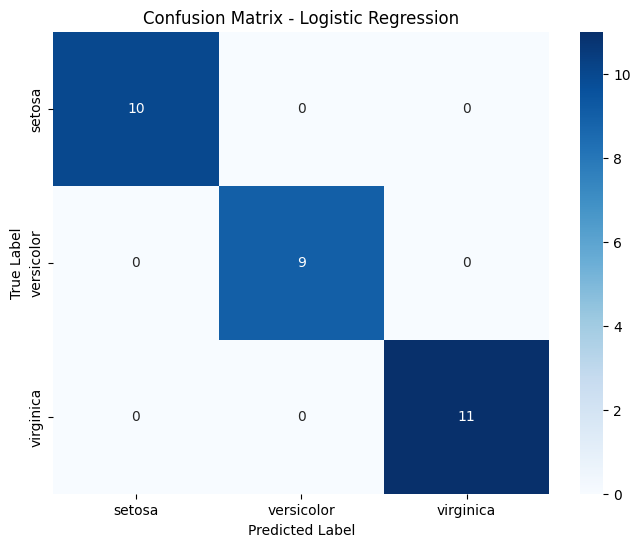

In [25]:
# 7. Plot confusion matrix for best model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [26]:
# 8. Feature importance (for models that support it)
if best_model_name in ['Decision Tree', 'Random Forest']:
    importances = pd.DataFrame({
        'feature': iris.feature_names,
        'importance': best_model.feature_importances_
    })
    importances = importances.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importances)
    plt.title(f'Feature Importance - {best_model_name}')
    plt.show()


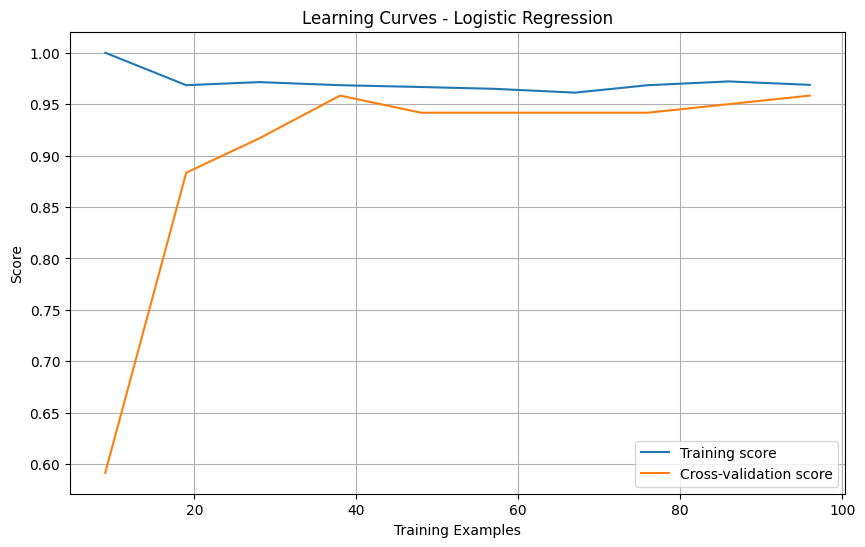

In [27]:
# 9. Learning curves for best model
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.title(f'Learning Curves - {best_model_name}')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [28]:
# 10. Function for making new predictions
def predict_iris(measurements, model=best_model, scaler=scaler):
    """
    Make predictions for new iris measurements.
    
    Parameters:
    measurements: array-like of shape (4,) containing
    [sepal length, sepal width, petal length, petal width]
    """
    # Scale the measurements
    scaled_measurements = scaler.transform([measurements])
    
    # Make prediction
    prediction = model.predict(scaled_measurements)
    
    # Return species name
    return iris.target_names[prediction[0]]

# Example usage
print("\n=== Example Prediction ===")
sample_measurements = [5.1, 3.5, 1.4, 0.2]  # Example measurements
print(f"Sample measurements: {sample_measurements}")
print(f"Predicted species: {predict_iris(sample_measurements)}")


=== Example Prediction ===
Sample measurements: [5.1, 3.5, 1.4, 0.2]
Predicted species: setosa


/var/data/python/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
